<a href="https://colab.research.google.com/github/urvashiramdasani/ML-DL-Python/blob/master/DL/18BCE247_DL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Urvashi Ramdasani

Division : EL3

Aim : 

In [1]:
# Load the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import keras
from sklearn import metrics
from keras.utils import np_utils
from keras.datasets import cifar10
import random

In [2]:
# Load the data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
X_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
X_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


In [3]:
# Class labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

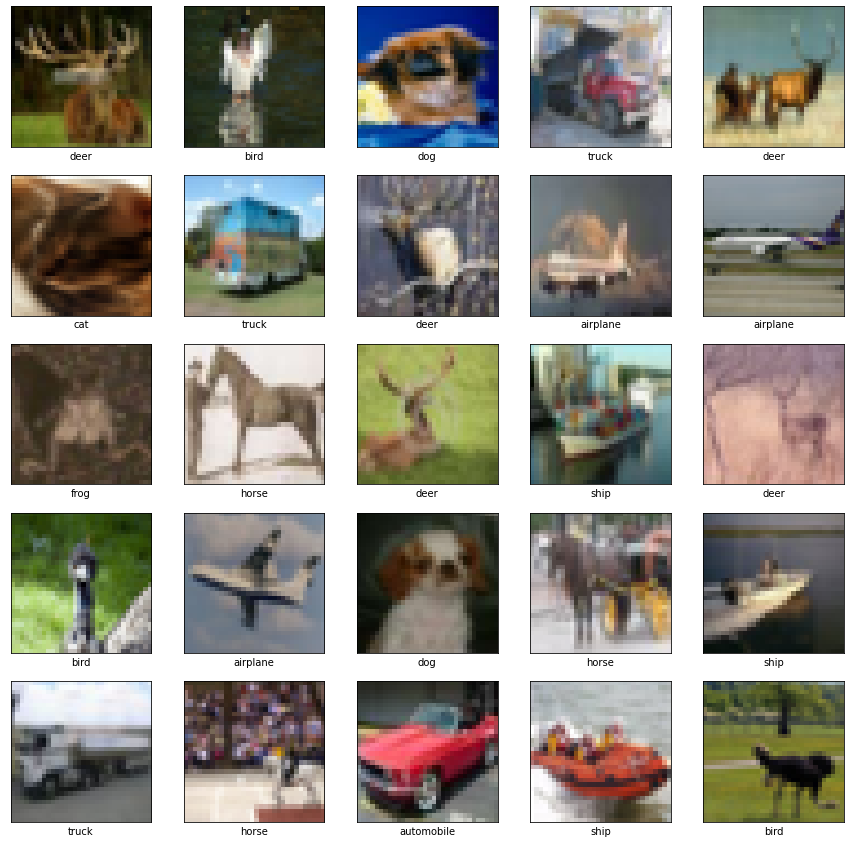

In [4]:
# Plotting random images

plt.figure(figsize = (15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0, len(X_train))
  plt.imshow(X_train[rand_no])
  plt.xlabel(class_names[int(y_train[rand_no])])

In [5]:
# Normalize data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# One Hot Encoding

y_train = np_utils.to_categorical(y_train)
y_test_tmp = y_test
y_test = np_utils.to_categorical(y_test)

In [7]:
# Define the model

model = Sequential()
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3), padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D((2, 2), strides = 2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D((2, 2), strides = 2))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D((2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [8]:
# Compile the model

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          1

In [10]:
# Train the model

history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
1407/1407 [==============================] - 769s 546ms/step - loss: 1.8363 - accuracy: 0.3178 - val_loss: 1.2217 - val_accuracy: 0.5592
Epoch 2/10
1407/1407 [==============================] - 771s 548ms/step - loss: 1.1730 - accuracy: 0.5792 - val_loss: 0.9752 - val_accuracy: 0.6500
Epoch 3/10
1407/1407 [==============================] - 770s 548ms/step - loss: 0.9283 - accuracy: 0.6697 - val_loss: 0.8628 - val_accuracy: 0.7032
Epoch 4/10
1407/1407 [==============================] - 769s 547ms/step - loss: 0.7657 - accuracy: 0.7275 - val_loss: 0.8350 - val_accuracy: 0.7110
Epoch 5/10
1407/1407 [==============================] - 768s 546ms/step - loss: 0.6523 - accuracy: 0.7692 - val_loss: 0.8240 - val_accuracy: 0.7190
Epoch 6/10
1407/1407 [==============================] - 768s 546ms/step - loss: 0.5613 - accuracy: 0.8061 - val_loss: 0.8685 - val_accuracy: 0.7180
Epoch 7/10
1407/1407 [==============================] - 768s 546ms/step - loss: 0.4860 - accuracy: 0.8297 - val_

In [11]:
# Evaluate the model

loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)
print("Loss on test data : ", loss_and_metrics[0])
print("Accuracy on test data : ", loss_and_metrics[1])

313/313 [==============================] - 39s 126ms/step - loss: 0.9745 - accuracy: 0.7276
Loss on test data :  0.9744712114334106
Accuracy on test data :  0.7275999784469604


In [12]:
# Make predictions

classes = model.predict(X_test, batch_size = 32)
y_predicted = []
for i in range(len(classes)):
  y_predicted.append(np.argmax(classes[i]))
print(y_predicted)

[5, 8, 0, 0, 6, 6, 3, 3, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 0, 9, 5, 3, 3, 0, 9, 6, 6, 5, 4, 3, 9, 8, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 2, 9, 8, 2, 6, 8, 8, 7, 3, 3, 5, 7, 5, 6, 3, 6, 2, 1, 2, 5, 7, 2, 6, 8, 8, 9, 2, 9, 3, 5, 8, 8, 8, 1, 7, 2, 7, 2, 4, 8, 9, 0, 2, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 3, 7, 4, 0, 6, 2, 9, 3, 0, 3, 2, 2, 8, 2, 1, 2, 8, 2, 8, 6, 6, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 0, 6, 5, 6, 3, 8, 2, 6, 5, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 3, 4, 2, 1, 6, 6, 0, 4, 8, 6, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 9, 0, 5, 2, 2, 3, 8, 2, 3, 3, 8, 5, 8, 3, 1, 7, 5, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 5, 7, 3, 9, 8, 2, 7, 9, 0, 2, 7, 6, 9, 3, 4, 9, 4, 4, 3, 6, 5, 1, 7, 1, 8, 0, 4, 9, 5, 3, 1, 1, 8, 9, 0, 6, 1, 8, 2, 0, 7, 3, 9, 9, 4, 7, 3, 0, 8, 9, 8, 1, 6, 7, 0, 8, 0, 4, 7, 3, 3, 7, 6, 3, 8, 5, 0, 2, 4, 3, 9, 1, 6, 1, 9, 9, 1, 0, 7, 9, 1, 2, 6, 1, 3, 4, 6, 0, 2, 6, 6, 6, 5, 2, 6, 1, 8, 2, 9, 4, 1, 6, 0, 2, 3, 0, 7, 7, 5, 5, 3, 3, 2, 5, 2, 1, 7, 5, 3, 6, 1, 9, 6, 

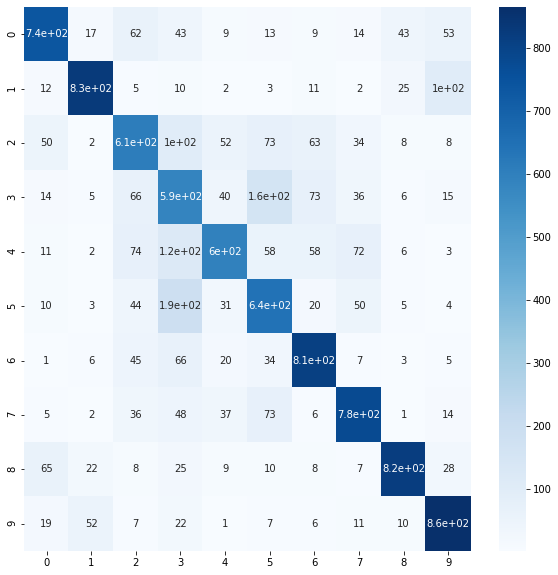

In [13]:
# Confusion matrix

import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
cm = metrics.confusion_matrix(y_true = y_test_tmp, y_pred = y_predicted)
sns.heatmap(cm, annot = True, cmap = 'Blues', ax = ax)

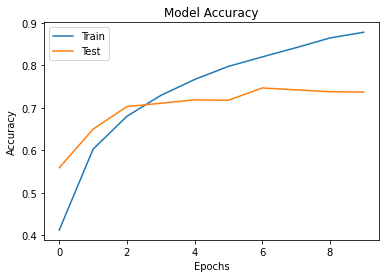

In [14]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Test'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

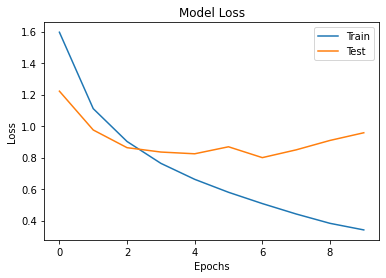

In [15]:
# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [16]:
# Save the model

model.save('cifar10.h5')